In [1]:
#!pip install streamlit
#!pip install sentencepiece
#!pip install accelerate
#!pip install transformers
#!pip install youtube_transcript_api
#!pip install pytube
#!pip install gradio
#!pip install nltk
#!pip install easygoogletranslate

In [2]:
#!python -m pip install --upgrade pip

In [3]:
#!pip install --upgrade google-api-python-client google-auth-httplib2 google-auth-oauthlib4

In [4]:
import torch
from pytube import YouTube
from transformers import pipeline
from youtube_transcript_api import YouTubeTranscriptApi
import logging
from easygoogletranslate import EasyGoogleTranslate
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize 
from typing import Tuple, Optional, List
from transformers import LlamaForCausalLM, LlamaTokenizer
import gradio as gr
import tqdm

c:\Users\Utkarsh Varman\Desktop\PRISM\torchhh\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [6]:
youtube_video = 'https://www.youtube.com/watch?v=nTuRqpyMu_4'

In [7]:
video_id = 'nTuRqpyMu_4'

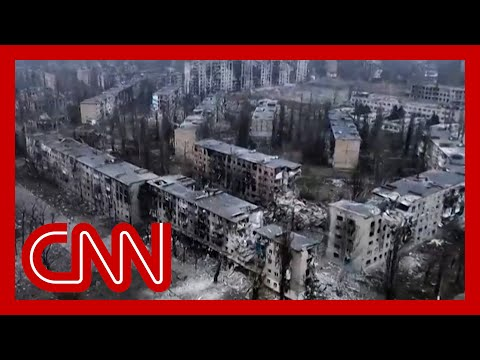

In [8]:
from IPython.display import YouTubeVideo
YouTubeVideo(video_id)

In [9]:
#torch.cuda.empty_cache()

In [10]:

'''from transformers import LlamaForCausalLM, LlamaTokenizer

# Hugging Face model_path
model_path = 'psmathur/orca_mini_3b'
tokenizer = LlamaTokenizer.from_pretrained(model_path)
model = LlamaForCausalLM.from_pretrained(
    model_path, 
    device_map="cuda",
    torch_dtype=torch.float16
)'''


'from transformers import LlamaForCausalLM, LlamaTokenizer\n\n# Hugging Face model_path\nmodel_path = \'psmathur/orca_mini_3b\'\ntokenizer = LlamaTokenizer.from_pretrained(model_path)\nmodel = LlamaForCausalLM.from_pretrained(\n    model_path, \n    device_map="cuda",\n    torch_dtype=torch.float16\n)'

In [11]:
YouTubeTranscriptApi.get_transcript(video_id)
transcript = YouTubeTranscriptApi.get_transcript(video_id)

In [12]:
result = ""
for i in transcript:
    result += ' ' + i['text']
#print(result)
print(len(result))

9738


In [13]:
def rem(text):
    # Replace commas, single quotes, and double quotes with an empty string
    cleaned_text = text.replace('"', '')
    return cleaned_text

In [14]:
clean_text = rem(result)

In [15]:
len(clean_text.split())

1708

In [16]:
from transformers import AutoTokenizer, AutoModelForCausalLM
import torch
from transformers import AutoModel, BitsAndBytesConfig
import os

os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "expandable_segments:True"
quant_config = BitsAndBytesConfig(
    load_in_8bit=True  # or load_in_8bit=True for 8-bit quantization
)
model_id = "meta-llama/Meta-Llama-3-8B-Instruct"

tokenizer = AutoTokenizer.from_pretrained(model_id)
model = AutoModelForCausalLM.from_pretrained(
    model_id,
    device_map="cuda",
    quantization_config=quant_config
)

'from transformers import AutoTokenizer, AutoModelForCausalLM\nimport torch\nfrom transformers import AutoModel, BitsAndBytesConfig\nimport os\n\nos.environ["PYTORCH_CUDA_ALLOC_CONF"] = "expandable_segments:True"\nquant_config = BitsAndBytesConfig(\n    load_in_8bit=True  # or load_in_8bit=True for 8-bit quantization\n)\nmodel_id = "meta-llama/Meta-Llama-3-8B-Instruct"\n\ntokenizer = AutoTokenizer.from_pretrained(model_id)\nmodel = AutoModelForCausalLM.from_pretrained(\n    model_id,\n    device_map="cuda",\n    quantization_config=quant_config\n)'

In [17]:
'''tokenizer.save_pretrained('LLamaModel/tokenizer')
model.save_pretrained('LLamaModel/model')'''

"tokenizer.save_pretrained('LLamaModel/tokenizer')\nmodel.save_pretrained('LLamaModel/model')"

In [18]:
from transformers import AutoTokenizer, AutoModelForCausalLM
import torch
from transformers import AutoModel, BitsAndBytesConfig
import os
tokenizer = AutoTokenizer.from_pretrained('LLamaModel/tokenizer/')
model = AutoModelForCausalLM.from_pretrained('LLamaModel/model/')

Unused kwargs: ['_load_in_4bit', '_load_in_8bit', 'quant_method']. These kwargs are not used in <class 'transformers.utils.quantization_config.BitsAndBytesConfig'>.
`low_cpu_mem_usage` was None, now set to True since model is quantized.
Loading checkpoint shards: 100%|██████████| 2/2 [01:32<00:00, 46.30s/it]


In [19]:
model.device

device(type='cuda', index=0)

In [20]:
'''instruction1 = "Generate a summary for this transcript:" + clean_text

messages = [
    {"role": "system", "content": "You are an AI assistant that follows instructions extremely well. Help as much as you can."},
    {"role": "user", "content": instruction1},
]

# Convert messages to input_ids
input_ids = tokenizer.apply_chat_template(
    messages,
    add_generation_prompt=True,
    return_tensors="pt"
).to(model.device)


attention_mask = torch.ones_like(input_ids)


# Generate the response
outputs = model.generate(
    input_ids,
    attention_mask=attention_mask,  
    max_new_tokens=100,
    eos_token_id=tokenizer.eos_token_id,  
    pad_token_id=tokenizer.eos_token_id,  
    do_sample=True,
    temperature=0.7,
    top_p=0.9,  
)

response = outputs[0][input_ids.shape[-1]:]
output_text = tokenizer.decode(response, skip_special_tokens=True)

print(output_text)'''


'instruction1 = "Generate a summary for this transcript:" + clean_text\n\nmessages = [\n    {"role": "system", "content": "You are an AI assistant that follows instructions extremely well. Help as much as you can."},\n    {"role": "user", "content": instruction1},\n]\n\n# Convert messages to input_ids\ninput_ids = tokenizer.apply_chat_template(\n    messages,\n    add_generation_prompt=True,\n    return_tensors="pt"\n).to(model.device)\n\n\nattention_mask = torch.ones_like(input_ids)\n\n\n# Generate the response\noutputs = model.generate(\n    input_ids,\n    attention_mask=attention_mask,  \n    max_new_tokens=100,\n    eos_token_id=tokenizer.eos_token_id,  \n    pad_token_id=tokenizer.eos_token_id,  \n    do_sample=True,\n    temperature=0.7,\n    top_p=0.9,  \n)\n\nresponse = outputs[0][input_ids.shape[-1]:]\noutput_text = tokenizer.decode(response, skip_special_tokens=True)\n\nprint(output_text)'

In [21]:
#print(len(output_text.split()))

In [22]:
# Sample Test Instruction Used by Youtuber Sam Witteveen https://www.youtube.com/@samwitteveenai
system = 'You are an AI assistant that follows instruction extremely well. Help as much as you can.'
instruction1 = "Generate a summary for this paragraph:" + clean_text[:10000]
#instruction2 = "Give answers related to this paragraph:" + clean_text[:10000]  generates questions
#instruction2 = "For the paragraph given below, give answers:" + '\n' + clean_text[:10000]  #Generates questions + Answers
instruction2 = "For the paragraph given below answer the asked questions,:" + '\n' + clean_text[:10000]

patterns1 = "how when where is does who what when"
patterns2 = {'summarize', 'summary', 'abstract', 'condense', 'outline', 'highlight'}

In [23]:
import gradio as gr
from typing import Tuple
import re
from pypdf import PdfReader

class VideoTranscriber:
    def get_yt_text(self, prompt: str, language: str) -> Tuple[str, str]:
        video_id = self.extract_youtube_video_id(prompt)
        try:
            transcript = YouTubeTranscriptApi.get_transcript(video_id)
        except Exception as e:
            return f"An error occurred: {e}", ""

        result = " ".join([i['text'] for i in transcript])
        result = result.replace('"', '')
        summary = self.generate_text(result)
        return result, summary
    
    def get_pdf_sum(self, prompt: str, language: str)-> Tuple[str, str]:
        summary = self.generate_text(prompt)
        return summary

    def extract_youtube_video_id(self, prompt):
        youtube_regex = (
            r'(?:https?://)?(?:www\.)?(?:youtube\.com|youtu\.?be)/'
            r'(?:watch\?v=|embed/|v/|.+\?v=)?([^\s&]+)'
        )
        match = re.search(youtube_regex, prompt)
        if match:
            return match.group(1)
        else:
            return None

    def generate_text(self, text: str) -> str:

        messages = [
            {"role": "system", "content": "You are an AI assistant that follows instructions extremely well. Help as much as you can."},
            {"role": "user", "content": text},
        ]
        input_ids = tokenizer.apply_chat_template(
            messages,
            add_generation_prompt=True,
            return_tensors="pt"
        ).to(model.device)
        attention_mask = torch.ones_like(input_ids)
        outputs = model.generate(
            input_ids,
            attention_mask=attention_mask,  
            max_new_tokens= len(text.split()),
            eos_token_id=tokenizer.eos_token_id,  
            pad_token_id=tokenizer.eos_token_id,  
            do_sample=True,
            temperature=0.5,
            top_p=0.8,  
        )
        response = outputs[0][input_ids.shape[-1]:]
        string = tokenizer.decode(response, skip_special_tokens=True)
        
        return f'[!] Response: {string}'


In [24]:
transcriber = VideoTranscriber()

def generate_summary(prompt: str, pdf_file) -> str:
    if pdf_file:
        reader = PdfReader(pdf_file)
        n = len(reader.pages)
        ftext = ''
        for i in range(n):
            page = reader.pages[i]
            text = page.extract_text()
            ftext += ' ' + text
        ftext = re.sub(' +', ' ', ftext)
        ftext = re.sub(r'[, " / ’ \' () “ ” - : & . ?]', ' ', ftext)
        ftext = ftext.replace('\n', ' ')
        ftext = prompt + " " + ftext
        summary = transcriber.get_pdf_sum(ftext, language="en")
        return f"Text Extracted from PDF: {ftext}\n\nResponse: {summary}"
    elif transcriber.extract_youtube_video_id(prompt):
        transcript, summary = transcriber.get_yt_text(prompt=prompt, language="en")
        return f"Transcript: {transcript}\n\nSummary: {summary}"
    else:
        return "Please provide a valid YouTube link or upload a PDF file."

with gr.Blocks(theme='abidlabs/dracula_revamped') as demo:
    gr.Markdown("<center><h1>Astra The Generator</h1></center>")
    gr.Markdown("<center><b>Generate in a jiffy</b></center>")
    
    with gr.Row():
        upload_pdf = gr.File(label="Upload PDF")
        prompt = gr.Textbox(label="Ask Astra", lines=2, max_lines=1, placeholder="Enter YouTube URL or text...")
        
    generate_btn = gr.Button("Generate", variant="primary", size="small")
    
    llama_output = gr.Markdown("<center>Llama Output</center>")
    
    generate_btn.click(
        fn=generate_summary,
        inputs=[prompt, upload_pdf],
        outputs=llama_output,
        show_progress="visible"
    )

demo.launch()

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


c:\Users\Utkarsh Varman\Desktop\PRISM\torchhh\lib\site-packages\transformers\models\llama\modeling_llama.py:603: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:555.)
  attn_output = torch.nn.functional.scaled_dot_product_attention(


In [44]:
'''import gradio as gr
system_prompt=''#'I am your friendly safe assistant .I always  try to produce the best answers for you'''
'''import time
def inference(prompt,hf_token,model, model_name):
    messages=[{"role": "system","content":system_prompt },{"role": "user","content": prompt}]
    if hf_token is None or not hf_token.strip():
        hf_token=os.getenv("Hf_Token")
    client= InferenceClient(model=model,token=hf_token)
    tokens=f"**`{model_name}`**\n\n"
    for completion in client.chat_completion(messages,max_tokens=200,stream=True):
        token = completion.choices[0].delta.content
        tokens+=token
        yield tokens
def hide_textbox():
    return gr.Textbox(visible=False)
with gr.Blocks(theme='abidlabs/dracula_revamped') as demo:
    gr.Markdown("<center><h1>Astra The Generator</h1></center>")
    gr.Markdown("<center><b>Generate in a jiffy</b></center")
    prompt=gr.Textbox(label="Prompt",lines=3,max_lines=10)
    token=gr.Textbox(label="Our Token",type="password",placeholder="Give a password of minimum 8 characters")
    with gr.Row():
         generate_btn= gr.Button("Generate",variant="primary",size="small")
         aipdf_btn=gr.Button("Ai Pdf summarizer",variant="secondary",size="small")
         ytobe_btn=gr.Button("Youtube Summarizer" ,variant="tertiary",size="small")
    with gr.Row() as output_row:
        llama_output=gr.Markdown("<center>Llama Output  </center>")
    prompt.submit(
       fn= inference,
       inputs=[prompt, token],
       outputs=[llama_output],
       show_progress="hidden"
    )
    gr.on(
       triggers=[prompt.submit,generate_btn.click],
       fn= hide_textbox,
       inputs=None,
       outputs=[token],
      
    ).then(
      
       fn= inference,
       inputs=[prompt, token],
       outputs=[llama_output],
       show_progress="hidden"
    )
    generate_btn.click(
       fn= inference,
       inputs=[prompt, token],
       outputs=[llama_output],
       show_progress="hidden"
    )
        
demo.launch()'''

'import time\ndef inference(prompt,hf_token,model, model_name):\n    messages=[{"role": "system","content":system_prompt },{"role": "user","content": prompt}]\n    if hf_token is None or not hf_token.strip():\n        hf_token=os.getenv("Hf_Token")\n    client= InferenceClient(model=model,token=hf_token)\n    tokens=f"**`{model_name}`**\n\n"\n    for completion in client.chat_completion(messages,max_tokens=200,stream=True):\n        token = completion.choices[0].delta.content\n        tokens+=token\n        yield tokens\ndef hide_textbox():\n    return gr.Textbox(visible=False)\nwith gr.Blocks(theme=\'abidlabs/dracula_revamped\') as demo:\n    gr.Markdown("<center><h1>Astra The Generator</h1></center>")\n    gr.Markdown("<center><b>Generate in a jiffy</b></center")\n    prompt=gr.Textbox(label="Prompt",lines=3,max_lines=10)\n    token=gr.Textbox(label="Our Token",type="password",placeholder="Give a password of minimum 8 characters")\n    with gr.Row():\n         generate_btn= gr.Button

In [ ]:
'''import gradio as gr
from typing import Tuple
import re
from pypdf import PdfReader

class VideoTranscriber:
    def get_yt_text(self, prompt: str, language: str) -> Tuple[str, str]:
        video_id = self.extract_youtube_video_id(prompt)
        try:
            transcript = YouTubeTranscriptApi.get_transcript(video_id)
        except Exception as e:
            print(f"An error occurred: {e}")

        transcript = YouTubeTranscriptApi.get_transcript(video_id)
        result = " ".join([i['text'] for i in transcript])
        result = result.replace('"', '')
        instruction1 = f"Generate a summary for this transcript: {result}"
        summary = self.generate_text(result)
        return result, summary
    
    def get_pdf_sum(self, prompt: str, language: str)-> Tuple[str, str]:
        instruction2 = f"Generate a summary for this paragraph: {prompt}"
        summary = self.generate_text(prompt)
        return summary

    def extract_youtube_video_id(self, prompt):
        youtube_regex = (
            r'(?:https?://)?(?:www\.)?(?:youtube\.com|youtu\.?be)/'
            r'(?:watch\?v=|embed/|v/|.+\?v=)?([^\s&]+)'
        )
        match = re.search(youtube_regex, prompt)
        if match:
            return match.group(1)
        else:
            return 0

    def generate_text(self, text: str) -> str:

        messages = [
            {"role": "system", "content": "You are an AI assistant that follows instructions extremely well. Help as much as you can."},
            {"role": "user", "content": text},
        ]
        input_ids = tokenizer.apply_chat_template(
            messages,
            add_generation_prompt=True,
            return_tensors="pt"
        ).to(model.device)
        attention_mask = torch.ones_like(input_ids)
        outputs = model.generate(
            input_ids,
            attention_mask=attention_mask,  
            max_new_tokens=150,
            eos_token_id=tokenizer.eos_token_id,  
            pad_token_id=tokenizer.eos_token_id,  
            do_sample=True,
            temperature=0.6,
            top_p=0.8,  
        )
        response = outputs[0][input_ids.shape[-1]:]
        string = tokenizer.decode(response, skip_special_tokens=True)
        
        return f'[!] Response: {string}'''

In [46]:
'''import gradio as gr
from typing import Tuple


class VideoTranscriber:
    def get_text(self, video_id: str, language: str) -> Tuple[str, str]:
        transcript = YouTubeTranscriptApi.get_transcript(video_id)
        result = " ".join([i['text'] for i in transcript])
        result = result.replace('"', '')
        summary = self.generate_text(result)
        return result, summary
        
        
    def generate_text(self, text: str) -> str:
        instruction = f"Generate a summary for this transcript: {text}"

        messages = [
            {"role": "system", "content": "You are an AI assistant that follows instructions extremely well. Help as much as you can."},
            {"role": "user", "content": instruction},
        ]
        input_ids = tokenizer.apply_chat_template(
            messages,
            add_generation_prompt=True,
            return_tensors="pt"
        ).to(model.device)
        attention_mask = torch.ones_like(input_ids)
        outputs = model.generate(
            input_ids,
            attention_mask=attention_mask,  
            max_new_tokens=100,
            eos_token_id=tokenizer.eos_token_id,  
            pad_token_id=tokenizer.eos_token_id,  
            do_sample=True,
            temperature=0.7,
            top_p=0.9,  
        )
        response = outputs[0][input_ids.shape[-1]:]
        string = tokenizer.decode(response, skip_special_tokens=True)
        
        return f'[!] Response: {string}'

# Create an instance of VideoTranscriber
transcriber = VideoTranscriber()

# Gradio Interface Integration
def summarize_youtube_video(video_id: str):
    transcript, summary = transcriber.get_text(video_id=video_id, language="en")
    return f"Transcript: {transcript}\n\nSummary: {summary}"

def hide_textbox():
    return gr.update(visible=False)

with gr.Blocks(theme='abidlabs/dracula_revamped') as demo:
    gr.Markdown("<center><h1>Astra The Generator</h1></center>")
    gr.Markdown("<center><b>Generate in a jiffy</b></center>")
    prompt = gr.Textbox(label="YouTube Video ID", lines=2, max_lines=1, placeholder="Enter YouTube video ID")
    
    with gr.Row():
        generate_btn = gr.Button("Generate Summary", variant="primary", size="small")
        aipdf_btn=gr.Button("AIPdf summarizer",variant="secondary",size="small")
    with gr.Row():
        llama_output = gr.Markdown("<center>Llama Output</center>")
        generate_btn.click(
            fn=summarize_youtube_video,
            inputs=[prompt],
            outputs=llama_output,
            show_progress="hidden"
        )
demo.launch()'''

'import gradio as gr\nfrom typing import Tuple\n\n\nclass VideoTranscriber:\n    def get_text(self, video_id: str, language: str) -> Tuple[str, str]:\n        transcript = YouTubeTranscriptApi.get_transcript(video_id)\n        result = " ".join([i[\'text\'] for i in transcript])\n        result = result.replace(\'"\', \'\')\n        summary = self.generate_text(result)\n        return result, summary\n        \n        \n    def generate_text(self, text: str) -> str:\n        instruction = f"Generate a summary for this transcript: {text}"\n\n        messages = [\n            {"role": "system", "content": "You are an AI assistant that follows instructions extremely well. Help as much as you can."},\n            {"role": "user", "content": instruction},\n        ]\n        input_ids = tokenizer.apply_chat_template(\n            messages,\n            add_generation_prompt=True,\n            return_tensors="pt"\n        ).to(model.device)\n        attention_mask = torch.ones_like(input_id